<a href="https://colab.research.google.com/github/tuyoi1/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ファイルはJPGを用いてください


Saving cat.jpg to cat.jpg
ファイルの名前：cat
知りたい箇所のx、y座標を入力します
元の画像に等間隔に線をひいた画像を用意できます
いりますか？  Yes=1,No=0:1
線と線の間隔を入力してください：50


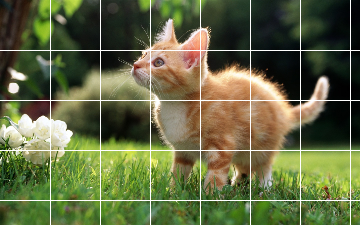

知りたい箇所のx、y座標を入力してください
x座標：225
y座標：135
探索場所


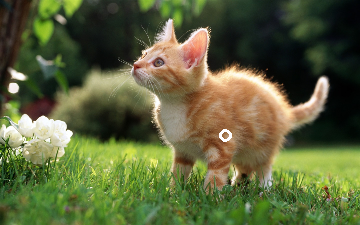

結果


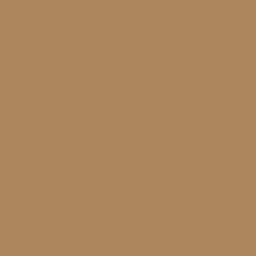

BGR
B=93・G=134・R=171


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

print('ファイルはJPGを用いてください')
f=files.upload()    #ファイルのアップロード
name=input('ファイルの名前：')
if '.jpg' in name:    #入力されたファイル名に'.jpg'が含まれるかどうか
  file_name=name
else:
  file_name=name+'.jpg'

img=cv2.imread(file_name,cv2.IMREAD_COLOR)
h = img.shape[0]
w = img.shape[1]
while True:    #読み込まれた画像の横幅が500よりも大きい場合500未満になるように調整
  if w>500:
    h=int(h/2)
    w=int(w/2)
  else:
    break
img= cv2.resize( img, (w, h) )


print('知りたい箇所のx、y座標を入力します')
print('元の画像に等間隔に線をひいた画像を用意できます')
img1=cv2.imread(file_name,cv2.IMREAD_COLOR)
img1= cv2.resize( img1, (w, h) )    #サイズ調整
iru=int(input('いりますか？  Yes=1,No=0:'))
if iru==1:
  hani=int(input('線と線の間隔を入力してください：'))
  i=hani
  j=hani
  while i<=w:
    cv2.line(img1,pt1= (i, 0),pt2= (i, h), color=(255, 255, 255), thickness=1)    #縦線作成
    i+=hani
  while j<=h:
    cv2.line(img1,pt1= (0, j),pt2= (w, j), color=(255, 255, 255), thickness=1)    #横線作成
    j+=hani
  cv2_imshow(img1)

print('知りたい箇所のx、y座標を入力してください')
while True:    #x座標の評価
  search_posx=int(input('x座標：'))
  if search_posx>h:
    print('入力された値は大きすぎます')
    print(f'0≦x≦{h}の範囲で入力してください')
  elif search_posx<0:
    print('入力された値は小さすぎます')
    print(f'0≦x≦{h}の範囲で入力してください')
  else:
    break
while True:    #y座標の評価
  search_posy=int(input('y座標：'))
  if search_posy>w:
    print('入力された値は大きすぎます')
    print(f'0≦x≦{w}の範囲で入力してください')
  elif search_posy<0:
    print('入力された値は小さすぎます')
    print(f'0≦x≦{w}の範囲で入力してください')
  else:
    break

cv2.circle(img,center=(search_posx,search_posy),radius=5,color=(255,255,255),thickness=2)    #探索場所をまるで示した図を作成
imghsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)    #BGR色空間をHSV色空間に変更

check=np.zeros((256,256,3),np.uint8)    #黒一色の画像作成
check[:,:]=imghsv[search_posy,search_posx]    #画像全体の色変更
check=cv2.cvtColor(check,cv2.COLOR_HSV2BGR)    #BGR色空間をHSV色空間に変更
cv2.imwrite('img_check_'+str(search_posx)+'_'+str(search_posy)+'.jpg',check)    #作成した色画像を保存

print('探索場所')
cv2_imshow(img)
print('結果')
cv2_imshow(check)
print('BGR')
print(f'B={img[search_posy,search_posx][0]}・G={img[search_posy,search_posx][1]}・R={img[search_posy,search_posx][2]}')
